### gerekli paketleri brain_desseases sanal ortamına kurdum
### bu sanal ortamda kurulan paketlerim arasında sürüm uyşmazlığı sorunu yok 
### gerekli oldukça paketleri içe aktarıcam önce verileri çekmek image'i numpy array'e çevirmek ve image işlemleri yapmak için gerekli üç modülü indireceğm

In [ ]:
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization, Rescaling  # DÜZELTİLEN KISIM
from tensorflow.keras.metrics import Accuracy
from keras.applications.vgg16 import VGG16

# setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)


### Downloading Images

### görseleri açmak için from PIL import Image diyip bunu open diyerek dosyayı açtık Image nesnesi olan img'in resize fonksiyonunu kullanarak ise boyutlandırık.
### Ancak bunları
### from tensorflow.keras.preprocessing.image import laod_img ile resmi açma işlemi yaparız 
### from tensorflow.jeras.preprocessing.image import img_to_array ile ise array'e çevrilir burdaki koda ise ile yaptık np.array(img) diyerek

### Peki aralrındaki fark nedir açılma şeklşne göre sonrasında görseli işlem noktasında ne tür farklılıkla rolur

### data listemizin içinde numpy arrayler şeklinde RGB olmak üzere
### her satırda ve her sütün çakışmasında denk gelen eleman 
### içinde üç tane sayısal değer olan bir pikslein rgb değerleri saklıdır
### bu listeyi işlemler yapabilmek için numpy arraye  çevirme işlemi yapacağız

In [ ]:
print("shape of traning data:", x_train.shape)
print("shape of traininig labels:",y_train.shape)
print("shape of test data:",x_test.shape)
print("shape of test labels:", y_test.shape)

shape of traning data: (177, 128, 128, 1)
shape of traininig labels: (177, 1)
shape of test data: (76, 128, 128, 1)
shape of test labels: (76, 1)


In [7]:
import numpy as np
import os
from PIL import Image

data = []  # Görselleri saklamak için liste
labels = []  # Etiketleri saklamak için liste

# Tümörlü görseller için
tumor_path = "C:/Users/LENOVO/Desktop/dataset/tumor_dataset"
for file in os.listdir(tumor_path):
    if file.endswith('.jpg'):
        img = Image.open(os.path.join(tumor_path, file))
        img = img.resize((128,128))  # Boyutunu 128x128 yap
        img = np.array(img)  # NumPy array'e çevir
        if img.shape == (128,128,3):  # RGB olmayanları filtrele
            data.append(img)
            labels.append(1)  # Tümörlü olduğu için 1 etiketi ekle

# Tümörsüz görseller için
no_tumor_path = "C:/Users/LENOVO/Desktop/dataset/no_tumor_dataset"
for file in os.listdir(no_tumor_path):
    if file.endswith('.jpg'):
        img = Image.open(os.path.join(no_tumor_path, file))
        img = img.resize((128,128))  # Boyutunu 128x128 yap
        img = np.array(img)  # NumPy array'e çevir
        if img.shape == (128,128,3):  # RGB olmayanları filtrele
            data.append(img)
            labels.append(0)  # Tümörsüz olduğu için 0 etiketi ekle

# NumPy array'e çevir
data = np.array(data)
labels = np.array(labels).reshape(-1,1)  # Etiketleri sütun vektörüne çevir

# Boyutları yazdır
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)


Data shape: (4166, 128, 128, 3)
Labels shape: (4166, 1)


### reshape fonksiyonu ile bir satır ya da süğtn fonksiyonları elde edilir
labels = np.array(labels).reshape(-1,1) ile labels arrayi sütün vektörüne çevrildi

### Processing the images

### modelin öğrenme sürecini kolaylaştırmak geneleştirme yeteneğini artırmak pikseleri doğru öğrenip doğru bir ağırlıkları elde etmesi bakımından veri normalizasyonu yapıyoruz 0-1 arasına çekerek bu normalizasyon işlemini yapamdan önce en yüksek ve en düşük değerleri buluyorum array içinden

In [8]:
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

255
0


In [9]:
#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

1.0
0.0


### Visualizing the images

# veri setindeki 5 görseli ekrana bastırdım aktarılmış veri setinin içeriğine bakmak ve incelemek için
# Grafik ve görseleştirme için kullanılan matplotlib kütüphanesinin pyplot modülü plt adıyla içeri aktardım
# fig = plt.figure(figsize=(5,5)) her image için 5x5'lik bir alan oluşturuyor
# plt.subplot(1,5,i+1) bu kod satırıyla 1 satır 5 sütünluk bir ızgara oluşşturdum burda 5 görsel bastırdığımız için bu şeklde örneğin 25 görsel için 5,5 den 25 lik dilim olup i+1. index'e sıradaki görsel yerleştirilir

In [ ]:
import  matplotlib.pyplot as plt
for i in range(5):
    fig = plt.figure(figsize=(5,5))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

### Model

### train_test_split sklearn.model_selection modülünden import edilen bir sınıftır bu sınıf input ve output şeklinde x ve y alır ve bunları x ve y'yi test_size göre böler shuffle = Ture olması ise veriyi karıştırarak ayırır daha iyi genelenmiş bir veri seti üzerinden ayırma işlemi yapılır random_state değişkeni ise rastgeleliği bir değişkende tutat tekrar gelip aynı rastgelelik üzerinden kodu çalıştırmak için rastgeleliği veren bir base sağlar

In [11]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [12]:
print("shape of our training data:",x_train.shape)
print("shape of our training labels:",y_train.shape)
print("shape of our test data:",x_test.shape)
print("shape of our test labels:",y_test.shape)

shape of our training data: (2916, 128, 128, 3)
shape of our training labels: (2916, 1)
shape of our test data: (1250, 128, 128, 3)
shape of our test labels: (1250, 1)


### Creating our baseline mode

### Filters parametresi kaç tane filtre kullanacağımzı belitir kernel_size parametrei filtrein boyutnu belirler 
### Padding işlemi sayesinde image deki boyut korunur kenarlar üzerinden ve bu sayede kenardaki özelliklerde hesaba katılır kenardan bilgi kaybı engelenir
### ilk kısımda gelelcek olan image'in boyutu veriliyor 128x128x3 = 2432 tan eparamtre her defasında input olarak girecektir


# activation function önemli bir parametredir 
# yapay sinir ağlarında aktivasyon fonksiyonun kullanım sebebi yapay sinir ağlarının doğrusal olmayan ilişkileri öğrenmesini sağlamak eğer aktivasyon fonksiiyonu kullanılmazsa ağ sadece doğrusal linear dönüşümler yapar bundan dolayı çok karmaşık ilişkileri yorumlaamk mümkün olmaz sigmoid swish(google tarafından uygulandı ilk defa ) reLU leaky reLU(vavishing graadient problemine çzöüm olarak) gibi aktivasyon fonksiyonları sayesinde nöronların çıktı toplama çıkrama yani matriks işlemleri dışında işlemlere tabi tutulduğu için örneğin reLU da 0 negatif değerleri 0'a çekerek linearliği bozup non-linear bir yapı katar bu sayede model karmaşık ilişkileri öğrenebilir hale gelir

# Pooling katmanı konvonüsyonel katman işlemlerinden sonra gelen image de özellikleri kaybetmeden boyutu küçültmek işlemi hızlandırmka ve modelin overfitting yapmasını engelemek
# daha az veri daha az maliyetli hesaplama tabi bu küçültme işlemşnde önemli özellikleri korur ağırlıkların fazla öğrenip ezberlemesinşi önler 
# ve en önemli diğer bir katkısı konum değişikliğine karşı duyarsız yapar modeli örneğin nesne biraz kayarsa dahi model onu farkedebilir
# Max Pooling belirli bir pencerre bir tür filtre gibi düşünüleiblir en büyük değeri alır yaygın olarak bu kullanılır
# Averge Pooling pencere içindeki ortlama değeri alır
# Global Pooling tüm alanın tek ortalama veya max değerini çıkarır
# İstersek conv ve pool katmanlarında stride parametresini kulanabiliriz
# conv2d'de stride=(1,1) demek her seferide 1 piksle kayar demektir (2,2) demek her seferide 2 piksel atlaya atlaya geçer demektir bu şekşlde feature map boyutları güçülür downsampling olarak çalışır
# Max pooling de ise pooling penceresinin kaç adımda kaydırılacağını belirtir eğer stride parametresini belirtmezsek default oalrak stride = pool_size olur yani pencere boyutu kadar kayar 

# layers.Flattem() CNN katmanları 2D(yükseklik genişlik) veya 3D(yükseklik genişlik,kanal) çıktıları üretir bu katman ise çok boyutlu veriyi tek bir vektör haline getirir.tek bşr vektör haline getirme sebebimiz düzleştirme sebebimiz mimarilerimizin son katmanalrına yerleştirdiğimiz dense (katman) giriş olarak 1D vektör alır CNN'nin uzamsal çıktısını tam bağlantılı bir katmana dönüştürür eğer CNN çıkışı (8,8,128) boyutundaysa Flatten katmanından sonra boyut 8* 8 * 128 = (8192,)
# Dropout katmanı ise AlexNet'e ilk karşıma çıktı bu makale ki aralarında Geoffrey E.Hinton'da olduğu bir makalede uygulandıldığı ve sonuçları paylaşılmış layers.dropout(0.25) her bir eğitim adımında her bir nöronun hayatına devam etmeme olasılığı 0.25'dir yani 0.25 olasılıkla ölebilir bu olasılığı göz önüne aldığımda hemem hemem %25' i sfırlanır diyebiliriz tabi bu bir olaslık belki yarısndan falası da yok olabilir ancak bu da bir olasılıktır ve düşük bir olasılıktır bu sayede aşırı öğrenme azaltılmak genelleme yeteneği artırılmak modein dayanıklılığını artırmak hedeflenir çünkü her seferinde farklı nöron kombnasyobalrıyla çalıltırıarak daha esnek hale gelir

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,033 (8.93 MB)

 Trainable params: 2,340,033 (8.93 MB)

 Non-trainable params: 0 (0.00 B)

# Optimizer parametresi burda en önemli olan parametrelerden biridir modelin öğrenmesindeki ana karakterlerdendir .Ağırlıkları günceleyen algoritmadır.
# En sık kullanılan optimizasyon algoritmaları SGD(Stochastic Gradient Descent) genelikle optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# RMSProp(Root Mean Square Propagation) 
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
# Adam (Adaptive Moment Estiamtion) RMSProp + Momentum birleşimi 


# model.compile ile modelin nasıl öğrenmesi gerrektiğini söyledim
# early_stopping ile ise aşırı öğrenme riskine karşı kontrol sistemi ekledim

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),#0'a yaklaşan değerlerde sayısal hataları önlemek için kullanılan çok küçük bşr sabit
    loss='binary_crossentropy',#ikili sınıflandırma da kullanılır modelin tahmin ile etiket arasındaki farkı ölçer.
    metrics=['accuracy']#Rğitimi takip edereken hangi metriğe bakmak istediğimiz söylediğimiz kısım modelin accuracy oranı izlenecek.
)

#including early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,#Eğitimde doğrulama kaybı(val_loss) 10 epoch boyunca sabit ya da gerilerse dur.
    min_delta=0.001,#iyileşme için farkın 0.001 olması gerekiyor bu değerden az değişimler gelişme olarak sayılamaz.
    restore_best_weights=True,#Eğitim durduğunda modelin en iyi olduğu epochtaki ağırlıklara geri dön
)

### Eğitim sırasında tüm veris setini bie seferde modele vermek çok maliyetli olur bunun yerine veri küçük parçalra batch'lere ayrılır batch_size=64 demek bir iterasyonda model'e veri setinden çekilen 64 görsel verilir 
###  BİR Epoch ise eğitim veri setinin TAMAMININ bir kez modelden geçirilmesidir örneğin 158 image varsa 64 64 30 şeklinde 3 batch oluşturulur her iterasyonda 1 batch işlenir tüm batch'ler biter veri seti bir kere hepsi modelden geçer buda bir epoch olur ve bir epoch tamamlanır

In [ ]:
history = model.fit(
    x = x_train,# eğitim verilerini görüntülemek için
    y = y_train,#eğiitm veirlerinin etiketlerini görüntülemek için
    validation_data= (x_test,y_test),#doğrula verisi ve etiketleri
    batch_size = 64,#her adımda 64 örnek üzerinden ağırlıkları güncele
    epochs=200,#max 200 kez tüm veri setini dolaş erken durudmr olabilir
    callbacks=[early_stopping],#eğer model uzun süre iyileşme göstermeze eğitimi durdur
    verbose=(2),#eğitim sırasında detaylı çıktılar yazdır
)

Epoch 1/200
46/46 - 64s - 1s/step - accuracy: 0.5669 - loss: 0.6861 - val_accuracy: 0.6696 - val_loss: 0.6714
Epoch 2/200
46/46 - 53s - 1s/step - accuracy: 0.6547 - loss: 0.6540 - val_accuracy: 0.6600 - val_loss: 0.6158
Epoch 3/200
46/46 - 56s - 1s/step - accuracy: 0.6732 - loss: 0.6111 - val_accuracy: 0.6920 - val_loss: 0.5983
Epoch 4/200
46/46 - 60s - 1s/step - accuracy: 0.6770 - loss: 0.5992 - val_accuracy: 0.6880 - val_loss: 0.5896
Epoch 5/200
46/46 - 65s - 1s/step - accuracy: 0.6848 - loss: 0.5839 - val_accuracy: 0.6928 - val_loss: 0.5705
Epoch 6/200
46/46 - 61s - 1s/step - accuracy: 0.6979 - loss: 0.5737 - val_accuracy: 0.7016 - val_loss: 0.5560
Epoch 7/200
46/46 - 64s - 1s/step - accuracy: 0.7075 - loss: 0.5530 - val_accuracy: 0.7120 - val_loss: 0.5337
Epoch 8/200
46/46 - 70s - 2s/step - accuracy: 0.7311 - loss: 0.5235 - val_accuracy: 0.7504 - val_loss: 0.5022
Epoch 9/200
46/46 - 65s - 1s/step - accuracy: 0.7651 - loss: 0.4785 - val_accuracy: 0.7648 - val_loss: 0.4664
Epoch 10/2

### history model.fit() fonksiyonundan dönen ve eğitim sürecinde her epochta oluşan kayıp ve doğruluk değerlerini tutan bir nesne
### history.history bu nesnein içinde loss, val_loss, accuracy, val_accuracy gibi verileri tutar
### history_frame = pd.DataFrame(history.history) bu satırdaki kod bütün bu kayıtları pandas dataframe çeviriyoruz ki üzerinde işlem ve görseleştirme yapmak kolay olsun
### .loc[:, ['loss','val_loss']].plot() → Eğitim kaybı (loss) ve doğrulama kaybı (val_loss) grafiğini çizdiriyoruz.
### .loc[:, ['accuracy','val_accuracy']].plot() → Eğitim doğruluğu (accuracy) ve doğrulama doğruluğu (val_accuracy) grafiğini çizdiriyoruz.


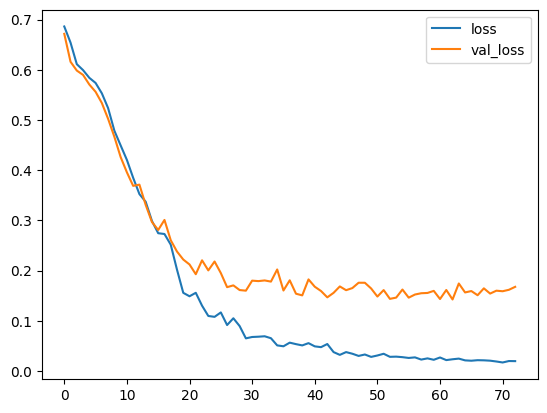

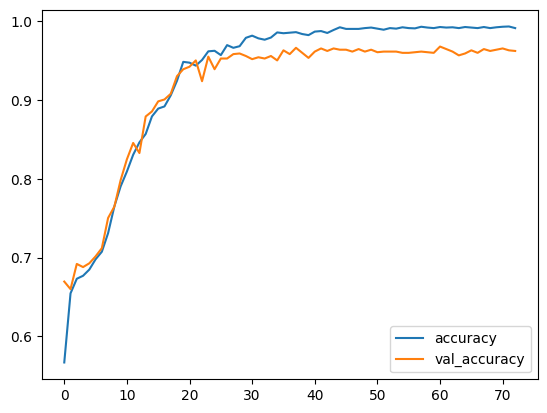

In [16]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

### Bu grafikelrin çıktıları özellikel overfitting durumunu gözlememiz için çok güçlü bir analiz sağlıyor
### loss vs val_loss başlangıçta bu değerler yüksektir çünkü model öğrenmeye yeni başlamıştır epoch ilerledikçe azalmaya başlar ancak 20.epochta aralarında küçük farkalr başalr bu fark bize overfitting riskinin yavaş yavaş oluşmaya başladığını modein eğitim verisini çok iyi öğrendiğini bu yüzden hatanın düştüğünü ancak ezberlediği için geneleme yeteneğini kaybetiği için test'deki hatanın yükseldiğini görüyoruz yani görmediği veriler için dopru tahmin yapma oranı düşük çünkü aslında gerçekten amaçladığımız öğrenme işini yapmadı ezberlemeye başladı

### Accuracy Val_Accuracy başlangıçta doğruluk düşük ve hzılı artıyor 20.epochdan sonra doğruluk neredeyse %100'e ulaşıyor val_accuracy ise %95 civarında sabit kalıyor aradaki fark yine overfitting belirtisi model eğitim verisinde mükemel performans gösteriyor ancak hiç görmediği doğrulama versinde daha düşük başarı sağlıyor çünkü geneleme yeteneğini kaybedip ezberleme yaptığı için modle başarısı düşüyor.

### Bu kod modelin yaptığı tahminelri ikili binary hale getirir modelin test verileri üzerinden tahminler yapmasını sağlayarak 0.5'Den küçükse 0 büyükse 1 yapar tahmin sonuçlarını int veri tipine dönüştürerek tam sayı hale getirir

In [17]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step


In [18]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96       613\n           1       0.95      0.97      0.96       637\n\n    accuracy                           0.96      1250\n   macro avg       0.96      0.96      0.96      1250\nweighted avg       0.96      0.96      0.96      1250\n'

# AlexNet modlinin tanıltıldığım makaleyi okuduğumda onların PCA on the set of RGB bir diğeri  layers.RandomCrop(224, 224),  kodunu uygulayarak  256x256'lık img'den sol alt üst  sağ alt üst ve merkez 224x224 boyutlarında kırpmalar yapar  bu şekilde ilk etata 5 görğntü ardından RandomFlip('horizontal')  bunu uyguklayarak ise x2'den total bir img'den 10 tane farklı image oluşturur

### 4.3 Adding data agumentation

# Data Augumentation sayesinde veri artırılarak overfitting önlenir örneğin layers.RandomFlip('horizontal') burda görüntü yatay olarak rastgele çevrilir bu sayede aynı zamanda model yansıtılımış varyasyonalra karşı daha dayanıklı hale gelir
# layers.RandomRotation(0.2),         # Rastgele döndürme (%20)
# layers.RandomZoom(0.1),             # Yakınlaştırma (%10)
# layers.RandomContrast(0.2), bu şekilde farklı yöntmelerde kullanılabilir


In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.RandomFlip('horizontal'),  # ✅ Hata düzeltildi
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])



In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [24]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/200
46/46 - 67s - 1s/step - accuracy: 0.6036 - loss: 0.6787 - val_accuracy: 0.6728 - val_loss: 0.6551
Epoch 2/200
46/46 - 60s - 1s/step - accuracy: 0.6674 - loss: 0.6340 - val_accuracy: 0.6864 - val_loss: 0.6118
Epoch 3/200
46/46 - 96s - 2s/step - accuracy: 0.6742 - loss: 0.6055 - val_accuracy: 0.7032 - val_loss: 0.5943
Epoch 4/200
46/46 - 71s - 2s/step - accuracy: 0.6886 - loss: 0.5917 - val_accuracy: 0.6832 - val_loss: 0.5753
Epoch 5/200
46/46 - 78s - 2s/step - accuracy: 0.6910 - loss: 0.5814 - val_accuracy: 0.6928 - val_loss: 0.5640
Epoch 6/200
46/46 - 83s - 2s/step - accuracy: 0.6992 - loss: 0.5613 - val_accuracy: 0.7064 - val_loss: 0.5402
Epoch 7/200
46/46 - 104s - 2s/step - accuracy: 0.7171 - loss: 0.5351 - val_accuracy: 0.7248 - val_loss: 0.5149
Epoch 8/200
46/46 - 76s - 2s/step - accuracy: 0.7517 - loss: 0.4994 - val_accuracy: 0.7592 - val_loss: 0.4829
Epoch 9/200
46/46 - 77s - 2s/step - accuracy: 0.7730 - loss: 0.4666 - val_accuracy: 0.7872 - val_loss: 0.4380
Epoch 10/

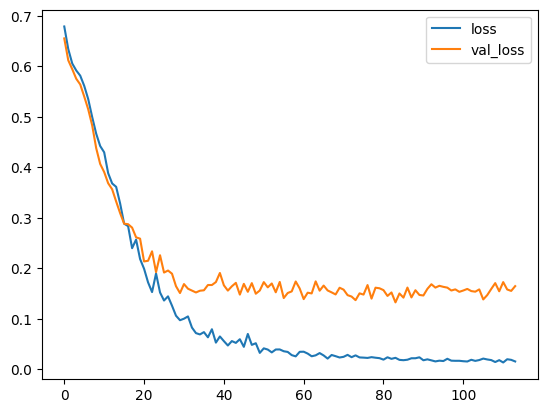

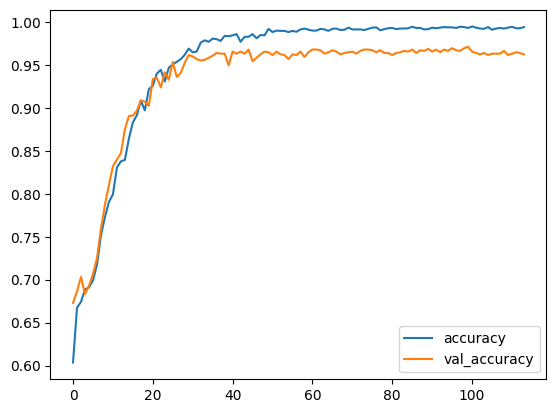

In [25]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [26]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step


In [27]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.97       613\n           1       0.96      0.97      0.97       637\n\n    accuracy                           0.97      1250\n   macro avg       0.97      0.97      0.97      1250\nweighted avg       0.97      0.97      0.97      1250\n'

### Adding a pretrained model

# VGG (Visual Geometry Group) Ağları
### VGG ağı, 2014 yılında Oxford Üniversitesi'ndeki Visual Geometry Group (VGG) tarafından geliştirilen bir derin öğrenme mimarisidir. Genellikle görüntü sınıflandırma ve nesne tanıma görevlerinde kullanılır.
# Bu tür bir önceden eğitilmiş model kullanma sebebimiz hali hazırda yüksek kaynak imkanı ve zaman vs önceden eğitilmiş ve elde edilmiş paramtreleri kullanrak kendi modleimize entegre ederek ardından kendi modleimize uygun bir yapıya çevirebilirz bu şekilde çokça kaynak tasarufu sağlamış oluruz

# Kodda VGG Kullanımı:
# VGG, genellikle Keras kütüphanesinde yer alan bir modeldir ve kolayca yüklenebilir.
# VGG16 Modelinin Yüklenmesi:
# weights='imagenet': Önceden eğitilmiş ImageNet ağırlıklarını kullanır.
# include_top=False: Üstteki sınıflandırma katmanını çıkarır, sadece özellik çıkarım katmanlarını kullanır.

#  Neden VGG Kullanmalıyız?
Derin Yapısı: Yüksek doğruluğa ulaşmak için derin bir mimari sunar.
Transfer Öğrenme: ImageNet gibi geniş veri setleriyle eğitildiği için özellik çıkarımında oldukça başarılıdır.
Özellik Çıkarımı: Küçük filtrelerle daha fazla ayrıntı öğrenebilir.
Model Performansı İyileştirme İpuçları:
Ağır Ağ Yapısı: Eğitim süresi uzundur, GPU kullanmak önemlidir.
Dropout Kullanımı: Aşırı öğrenmeyi azaltmak için uygundur.
Veri Artırma: Daha fazla çeşitlilik katmak için veri artırma teknikleriyle birlikte kullanılabilir.
VGG16 ve VGG19 gibi modeller, daha büyük ve daha karmaşık veri setlerinde genellikle daha iyi sonuçlar verir.

In [ ]:
# load base model
from tensorflow.keras.utils import get_file

vgg16_weight_path = get_file(
    "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    "https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    cache_subdir="models"
)

# Şimdi ağırlıkları dosyadan yükleyerek modeli oluştur
base_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False,
    input_shape=(128,128,3)
    )


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 124s 2us/step


In [36]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

# VGG16 Modelini Yükle
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Modeli Tanımla
model = Sequential([
    layers.RandomFlip('horizontal'),  # ✅ preprocessing yerine layers.RandomFlip
    
    base_model,  # ✅ VGG16 modeli
    
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.summary()  # Model özetini yazdır


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=40,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# ✅ 1. En son kaydedilen modeli yükle
model = load_model("model_epoch_33_val_acc_0.9808.h5")  # 🔥 En son checkpoint dosyanı gir!

# ✅ 2. ModelCheckpoint ve EarlyStopping callback'lerini tekrar tanımla
checkpoint = ModelCheckpoint(
    "model_epoch_{epoch:02d}_val_acc_{val_accuracy:.4f}.h5",#burda her defasında oluşan modelerin ağırlıklarını kaydettim çünkü en iiy model aralarda kalabilir bu yüzden ağırlıkalrı her defasında aklaydederek gittim
    monitor="val_accuracy",
    save_best_only=False,
    save_weights_only=False,
    verbose=1
)

# ✅ 3. Eğitime devam et (34. epoch'tan başlıyor!)
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=64,  # Eğer hata alıyorsan batch_size'ı küçült!
    initial_epoch=34,  # 🔥 Eğitime 34. epoch'tan başla
    epochs=200,  # Toplam 200 epoch hedefleniyor, devam edecek
    callbacks=[early_stopping, checkpoint],
    verbose=2,
)


MemoryError: Unable to allocate 547. MiB for an array with shape (2916, 128, 128, 3) and data type float32

# Yukaridaki hatayı alma sebebim memory yetersizlği donanım eksikliğinden kaynaklı bir durum oldu düzletmek için batch_size ve kod yoğunluğunu kaldırğp daha az bellek gerektirecek iekilde kodumu düzenledim

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Modeli her epoch sonunda kaydetmek için callback oluştur
checkpoint = ModelCheckpoint(
    "model_epoch_{epoch:02d}_val_acc_{val_accuracy:.4f}.h5",  # Dosya adı formatı
    monitor="val_accuracy",  # Modelin doğruluğunu takip et
    save_best_only=False,  # Her epoch sonunda kaydet (En iyi modeli değil, tüm modelleri kaydet)
    save_weights_only=False,  # Tüm modeli kaydet (sadece ağırlıkları değil)
    verbose=1  # Kaydetme işlemini ekrana yazdır
)

# Modeli eğit
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=200,
    callbacks=[early_stopping, checkpoint],  # ✅ ModelCheckpoint callback'i eklendi
    verbose=2,
)


Epoch 1/200

Epoch 1: saving model to model_epoch_01_val_acc_0.9808.h5


46/46 - 1765s - 38s/step - accuracy: 0.9815 - loss: 0.0583 - val_accuracy: 0.9808 - val_loss: 0.0586
Epoch 2/200

Epoch 2: saving model to model_epoch_02_val_acc_0.9664.h5


46/46 - 1191s - 26s/step - accuracy: 0.9883 - loss: 0.0400 - val_accuracy: 0.9664 - val_loss: 0.1055
Epoch 3/200

Epoch 3: saving model to model_epoch_03_val_acc_0.9760.h5


46/46 - 1158s - 25s/step - accuracy: 0.9791 - loss: 0.0522 - val_accuracy: 0.9760 - val_loss: 0.0790
Epoch 4/200

Epoch 4: saving model to model_epoch_04_val_acc_0.9776.h5


46/46 - 1166s - 25s/step - accuracy: 0.9760 - loss: 0.0689 - val_accuracy: 0.9776 - val_loss: 0.0706
Epoch 5/200

Epoch 5: saving model to model_epoch_05_val_acc_0.9848.h5


46/46 - 1157s - 25s/step - accuracy: 0.9856 - loss: 0.0379 - val_accuracy: 0.9848 - val_loss: 0.0490
Epoch 6/200

Epoch 6: saving model to model_epoch_06_val_acc_0.9608.h5


46/46 - 1174s - 26s/step - accuracy: 0.9887 - loss: 0.0319 - val_accuracy: 0.9608 - val_loss: 0.1039
Epoch 7/200

Epoch 7: saving model to model_epoch_07_val_acc_0.9816.h5


46/46 - 1161s - 25s/step - accuracy: 0.9856 - loss: 0.0418 - val_accuracy: 0.9816 - val_loss: 0.0452
Epoch 8/200

Epoch 8: saving model to model_epoch_08_val_acc_0.9656.h5


46/46 - 1165s - 25s/step - accuracy: 0.9918 - loss: 0.0304 - val_accuracy: 0.9656 - val_loss: 0.1023
Epoch 9/200

Epoch 9: saving model to model_epoch_09_val_acc_0.9720.h5


46/46 - 1206s - 26s/step - accuracy: 0.9890 - loss: 0.0339 - val_accuracy: 0.9720 - val_loss: 0.0809
Epoch 10/200

Epoch 10: saving model to model_epoch_10_val_acc_0.9800.h5


46/46 - 1166s - 25s/step - accuracy: 0.9880 - loss: 0.0305 - val_accuracy: 0.9800 - val_loss: 0.0581
Epoch 11/200

Epoch 11: saving model to model_epoch_11_val_acc_0.9760.h5


46/46 - 1162s - 25s/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9760 - val_loss: 0.0601
Epoch 12/200

Epoch 12: saving model to model_epoch_12_val_acc_0.9728.h5


46/46 - 1159s - 25s/step - accuracy: 0.9877 - loss: 0.0309 - val_accuracy: 0.9728 - val_loss: 0.0874
Epoch 13/200

Epoch 13: saving model to model_epoch_13_val_acc_0.9760.h5


46/46 - 1153s - 25s/step - accuracy: 0.9894 - loss: 0.0301 - val_accuracy: 0.9760 - val_loss: 0.0704
Epoch 14/200

Epoch 14: saving model to model_epoch_14_val_acc_0.9816.h5


46/46 - 1154s - 25s/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.9816 - val_loss: 0.0532
Epoch 15/200

Epoch 15: saving model to model_epoch_15_val_acc_0.9760.h5


46/46 - 1154s - 25s/step - accuracy: 0.9760 - loss: 0.0654 - val_accuracy: 0.9760 - val_loss: 0.0718
Epoch 16/200

Epoch 16: saving model to model_epoch_16_val_acc_0.9776.h5


46/46 - 1197s - 26s/step - accuracy: 0.9873 - loss: 0.0345 - val_accuracy: 0.9776 - val_loss: 0.0534
Epoch 17/200

Epoch 17: saving model to model_epoch_17_val_acc_0.9832.h5


46/46 - 1209s - 26s/step - accuracy: 0.9883 - loss: 0.0321 - val_accuracy: 0.9832 - val_loss: 0.0462
Epoch 18/200

Epoch 18: saving model to model_epoch_18_val_acc_0.9856.h5


46/46 - 1172s - 25s/step - accuracy: 0.9914 - loss: 0.0187 - val_accuracy: 0.9856 - val_loss: 0.0568
Epoch 19/200

Epoch 19: saving model to model_epoch_19_val_acc_0.9824.h5


46/46 - 1183s - 26s/step - accuracy: 0.9931 - loss: 0.0166 - val_accuracy: 0.9824 - val_loss: 0.0490
Epoch 20/200

Epoch 20: saving model to model_epoch_20_val_acc_0.9712.h5


46/46 - 1148s - 25s/step - accuracy: 0.9904 - loss: 0.0282 - val_accuracy: 0.9712 - val_loss: 0.0903
Epoch 21/200

Epoch 21: saving model to model_epoch_21_val_acc_0.9776.h5


46/46 - 1146s - 25s/step - accuracy: 0.9887 - loss: 0.0266 - val_accuracy: 0.9776 - val_loss: 0.0549
Epoch 22/200

Epoch 22: saving model to model_epoch_22_val_acc_0.9792.h5


46/46 - 1149s - 25s/step - accuracy: 0.9914 - loss: 0.0178 - val_accuracy: 0.9792 - val_loss: 0.0525
Epoch 23/200

Epoch 23: saving model to model_epoch_23_val_acc_0.9792.h5


46/46 - 1190s - 26s/step - accuracy: 0.9938 - loss: 0.0162 - val_accuracy: 0.9792 - val_loss: 0.0542
Epoch 24/200

Epoch 24: saving model to model_epoch_24_val_acc_0.9824.h5


46/46 - 1225s - 27s/step - accuracy: 0.9938 - loss: 0.0156 - val_accuracy: 0.9824 - val_loss: 0.0546
Epoch 25/200

Epoch 25: saving model to model_epoch_25_val_acc_0.9792.h5


46/46 - 1199s - 26s/step - accuracy: 0.9897 - loss: 0.0250 - val_accuracy: 0.9792 - val_loss: 0.0778
Epoch 26/200

Epoch 26: saving model to model_epoch_26_val_acc_0.9784.h5


46/46 - 2699s - 59s/step - accuracy: 0.9904 - loss: 0.0254 - val_accuracy: 0.9784 - val_loss: 0.0524
Epoch 27/200

Epoch 27: saving model to model_epoch_27_val_acc_0.9872.h5


46/46 - 1149s - 25s/step - accuracy: 0.9890 - loss: 0.0298 - val_accuracy: 0.9872 - val_loss: 0.0499
Epoch 28/200

Epoch 28: saving model to model_epoch_28_val_acc_0.9864.h5


46/46 - 1183s - 26s/step - accuracy: 0.9904 - loss: 0.0232 - val_accuracy: 0.9864 - val_loss: 0.0397
Epoch 29/200

Epoch 29: saving model to model_epoch_29_val_acc_0.9784.h5


46/46 - 1254s - 27s/step - accuracy: 0.9925 - loss: 0.0185 - val_accuracy: 0.9784 - val_loss: 0.0603
Epoch 30/200

Epoch 30: saving model to model_epoch_30_val_acc_0.9848.h5


46/46 - 1132s - 25s/step - accuracy: 0.9918 - loss: 0.0145 - val_accuracy: 0.9848 - val_loss: 0.0411
Epoch 31/200

Epoch 31: saving model to model_epoch_31_val_acc_0.9816.h5


46/46 - 1140s - 25s/step - accuracy: 0.9931 - loss: 0.0143 - val_accuracy: 0.9816 - val_loss: 0.0441
Epoch 32/200

Epoch 32: saving model to model_epoch_32_val_acc_0.9824.h5


46/46 - 1126s - 24s/step - accuracy: 0.9955 - loss: 0.0117 - val_accuracy: 0.9824 - val_loss: 0.0479
Epoch 33/200

Epoch 33: saving model to model_epoch_33_val_acc_0.9808.h5


46/46 - 1128s - 25s/step - accuracy: 0.9938 - loss: 0.0137 - val_accuracy: 0.9808 - val_loss: 0.0414
Epoch 34/200


AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/sequential_3_1/vgg16_1/block4_conv2_1/Relu defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_ops.cc:1112
	 [[{{node StatefulPartitionedCall/sequential_3_1/vgg16_1/block4_conv2_1/Relu}}]] [Op:__inference_multi_step_on_iterator_73200]

In [ ]:
'''history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)'''

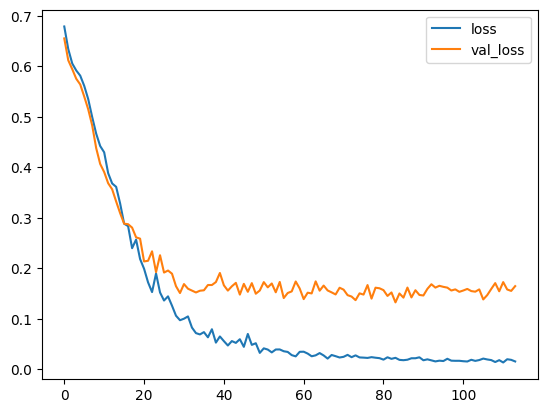

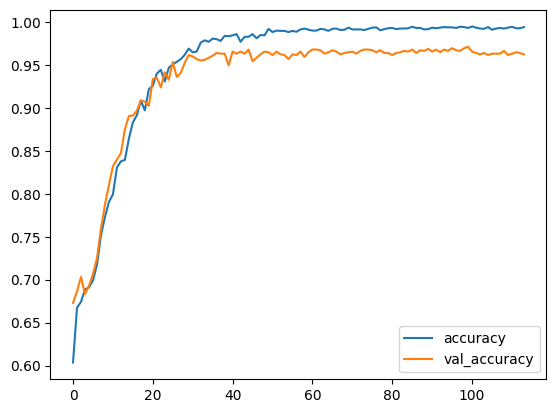

In [43]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [49]:

# x_test'in veri tipini küçült (Belleği daha az kullanır)
x_test = x_test.astype('float16')

# Belleğe yük bindirmemek için batch halinde tahmin yap
batch_size = 16  # Daha küçük batch boyutu deneyerek bellek tüketimini azalt
pred = np.zeros((len(x_test), 1), dtype='float16')  # Boş bir dizi oluştur

# Modeli parça parça tahmin yapmaya zorla (Bellek dostu yöntem)
for i in range(0, len(x_test), batch_size):
    pred[i:i+batch_size] = model.predict_on_batch(x_test[i:i+batch_size])

# Tahminleri 0 ve 1'e çevir
pred = (pred > 0.5).astype(int)

print("Tahminler tamamlandı!")


Tahminler tamamlandı!


# classification_report, scikit-learn kütüphanesinin bir fonksiyonudur ve sınıflandırma modelinizin performansını özetleyen bir rapor oluşturur.
# Bu rapor, modelinizin doğruluk (accuracy), hassasiyet (precision), duyarlılık (recall) ve F1 skoru gibi önemli metriklerini içerir.
Metrik	Anlamı
Precision	Modelin pozitif tahminlerinin doğru olma oranını gösterir. (TP / (TP + FP))
Recall	Modelin doğru tahmin ettiği gerçek pozitiflerin oranını gösterir. (TP / (TP + FN))
F1-Score	Precision ve Recall'un harmonik ortalaması. (2 * (Precision * Recall) / (Precision + Recall))
Support	Her sınıfa ait örnek sayısıdır.
Accuracy	Modelin doğru tahmin ettiği tüm örneklerin oranı.
Macro Avg	Tüm sınıfların ortalama değeridir.
Weighted Avg	Sınıf sayısına göre ağırlıklı ortalama değeridir.

In [50]:
#creating a classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       613\n           1       0.98      0.98      0.98       637\n\n    accuracy                           0.98      1250\n   macro avg       0.98      0.98      0.98      1250\nweighted avg       0.98      0.98      0.98      1250\n'

In [ ]:
'''pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)'''


### Son olarak modelimi kullanma aşamasına geldik bu aşamada eğitim sürecinde kaydedilmiş en iyi model dosyasını yükleriz .
### Görüntüyü yükler yeniden boyutlandırır ve normalleştirir modelin beklediği formata düzenler
### Görüntüyü modele verir ve tahmin sonucumuzu ekrana bastırız
### Kullnıcı etkileşimli olması noktasında Tkinter kullanarak bilgisayarımızdan seçip yapması üzere bir pencere açılır kullanıcı bir görüntü seçtikten sonra tahmini yapılıp sonuc ekranda gösterilir.

### Results

Seçilen dosya: C:/Users/LENOVO/Desktop/pred/file_2025-03-06_10.08.28.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


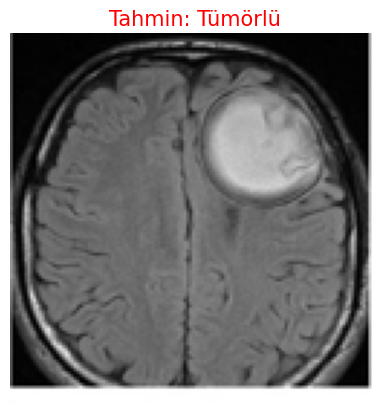

🚨 TAHMİN: Tümörlü Görüntü (Skor: 1.00) 🚨


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Modeli yükle
model_path = "model_epoch_33_val_acc_0.9808.h5"  # En son kaydedilen model dosyan
model = load_model(model_path)

def preprocess_image(image_path):
    """
    Görüntüyü modelin eğitim formatına uygun şekilde işler.
    """
    img = Image.open(image_path).convert("RGB")  # Görüntüyü aç ve RGB formatına çevir
    img = img.resize((128, 128))  # Eğitimde kullanılan boyuta getir
    img = np.array(img)  # NumPy array'e çevir

    # Boyut kontrolü ve düzeltme
    if len(img.shape) == 2:  
        img = np.stack((img,) * 3, axis=-1)  # (128,128) → (128,128,3)

    elif img.shape[-1] == 4:  
        img = img[:, :, :3]  # RGBA ise Alpha kanalını kaldır

    if img.shape != (128, 128, 3):  
        print(f"Hatalı giriş boyutu: {img.shape}")
        return None

    img = img.astype('float32') / 255.0  # Normalize et
    img = np.expand_dims(img, axis=0)  # Modelin beklediği formata getir (1,128,128,3)
    return img


def predict_image(image_path):
    """
    Seçilen görüntüyü işler ve modelden tümör tahmini alır.
    """
    img = preprocess_image(image_path)
    if img is None:
        return
    
    # Modelin tahmini
    prediction = model.predict(img)[0][0]  # Model tahmini al ve skoru al

    # Tahmin sonucunu yazdır
    plt.imshow(np.squeeze(img))  # Görüntüyü göster
    plt.axis("off")
    plt.title("Tahmin: Tümörlü" if prediction > 0.5 else "Tahmin: Tümörsüz", fontsize=15, color="red" if prediction > 0.5 else "green")
    plt.show()

    threshold = 0.6  # Varsayılan 0.5 yerine 0.6 deneyelim
    if prediction > threshold:
        print(f"TAHMİN: Tümörlü Görüntü (Skor: {prediction:.2f}) ")
    else:
        print(f"TAHMİN: Tümörsüz Görüntü (Skor: {prediction:.2f}) ")


def select_image():
    """
    Kullanıcıya bir dosya seçme penceresi açar ve seçilen görüntüyü tahmin eder.
    """
    root = tk.Tk()
    root.withdraw()  # Ana pencereyi gizle
    file_path = filedialog.askopenfilename(title="Bir görüntü seç", filetypes=[("JPG Files", "*.jpg"), ("PNG Files", "*.png"), ("All Files", "*.*")])
    
    if file_path:  # Eğer kullanıcı bir dosya seçtiyse
        print(f"Seçilen dosya: {file_path}")
        predict_image(file_path)
    else:
        print("Görüntü seçilmedi!")

# Dosya seçme penceresini aç
select_image()


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# En son kaydedilen modeli yükle
model_path = "model_epoch_33_val_acc_0.9808.h5"  # En son kaydedilen model dosyan
model = load_model(model_path)

def preprocess_image(image_path):
    """
    Görüntüyü modelin eğitim formatına uygun şekilde işler.
    """
    img = Image.open(image_path)  # Görüntüyü aç
    img = img.resize((128, 128))  # Eğitimde kullanılan boyuta getir
    img = np.array(img)  # NumPy array'e çevir

    # Eğer gri tonlamalıysa, 3 kanallı RGB'ye çevir
    if len(img.shape) == 2:
        img = np.stack((img,) * 3, axis=-1)  # (128,128) → (128,128,3)

    # Boyut kontrolü
    if img.shape != (128, 128, 3):
        print(f"Hatalı giriş boyutu: {img.shape}")
        return None

    # Veriyi normalize et (0-1 aralığına getir)
    img = img.astype('float32') / 255.0  

    # Modelin beklediği formatta şekillendir (1,128,128,3)
    img = np.expand_dims(img, axis=0)

    return img

def predict_image(image_path):
    """
    Verilen bir görüntüyü işler ve modelden tümör tahmini alır.
    """
    img = preprocess_image(image_path)
    if img is None:
        return
    
    # Modelin tahmini
    prediction = model.predict(img)[0][0]  # Model tahmini al ve skoru al

    # Tahmin sonucunu yazdır
    plt.imshow(np.squeeze(img))  # Görüntüyü göster
    plt.axis("off")
    plt.title("Tahmin: Tümörlü" if prediction > 0.5 else "Tahmin: Tümörsüz", fontsize=15, color="red" if prediction > 0.5 else "green")
    plt.show()

    if prediction > 0.5:
        print(f"🚨 TAHMİN: Tümörlü Görüntü (Skor: {prediction:.2f}) 🚨")
    else:
        print(f"✅ TAHMİN: Tümörsüz Görüntü (Skor: {prediction:.2f}) ✅")

# Kullanıcıdan gelen test görüntüsü
image_path = "C:/Users/LENOVO/Desktop/test_image.jpg"  # Test etmek istediğin resmin yolu
predict_image(image_path)
